## Imports

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Data

In [2]:
csv_files = ['ts.csv', 'aco.csv']
configs_names = ['Busca Tabu', 'Colônia de Formigas']
result_columns = ['k', 'k-1', 'k-2', 'k-3']

all_data = pd.DataFrame()

for i, file in enumerate(csv_files):
    file_path = os.path.join('..', 'out', file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df_melted = df.melt(id_vars=['file_path'], 
                            value_vars=result_columns,
                            var_name='Tipo K', 
                            value_name='Conflitos')
        df_melted['Conflitos'] = pd.to_numeric(df_melted['Conflitos'], errors='coerce')
        df_melted['Metaheurística'] = configs_names[i]
        all_data = pd.concat([all_data, df_melted], ignore_index=True)
    else:
        print(f"Erro: Arquivo '{file_path}' não encontrado.")

print("Dados consolidados:")
print(all_data.head())

Dados consolidados:
        file_path Tipo K  Conflitos Metaheurística
0        anna.col      k     0.2028     Busca Tabu
1       david.col      k     0.0000     Busca Tabu
2  fpsol2.i.1.col      k     0.0000     Busca Tabu
3  fpsol2.i.2.col      k     0.0115     Busca Tabu
4  fpsol2.i.3.col      k     0.0115     Busca Tabu


## Distribution


Medianas dos Conflitos:
Metaheurística
Colônia de Formigas    0.12915
Busca Tabu             0.19605
Name: Conflitos, dtype: float64

Médias dos Conflitos:
Metaheurística
Colônia de Formigas    2.547264
Busca Tabu             2.824083
Name: Conflitos, dtype: float64

Melhor Metaheurística (mediana): Colônia de Formigas com mediana de 0.1291 conflitos.
Melhor Metaheurística (média): Colônia de Formigas com média de 2.5473 conflitos.


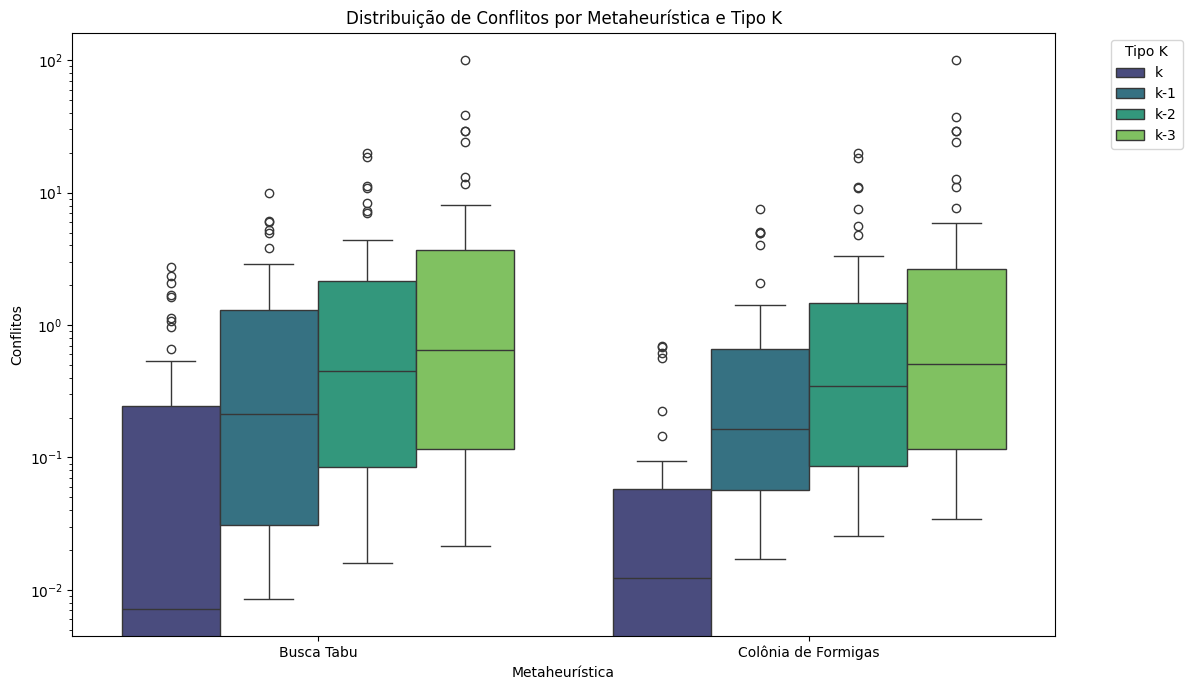

In [3]:
median_results = all_data.groupby('Metaheurística')['Conflitos'].median().sort_values()
mean_results = all_data.groupby('Metaheurística')['Conflitos'].mean().sort_values()

print("\nMedianas dos Conflitos:")
print(median_results)
print("\nMédias dos Conflitos:")
print(mean_results)

best_config_median = median_results.index[0]
best_median_value = median_results.iloc[0]
print(f"\nMelhor Metaheurística (mediana): {best_config_median} com mediana de {best_median_value:.4f} conflitos.")

best_config_mean = mean_results.index[0]
best_mean_value = mean_results.iloc[0]
print(f"Melhor Metaheurística (média): {best_config_mean} com média de {best_mean_value:.4f} conflitos.")

plt.figure(figsize=(12, 7))
sns.boxplot(data=all_data, x='Metaheurística', y='Conflitos', hue='Tipo K', palette='viridis')
plt.title('Distribuição de Conflitos por Metaheurística e Tipo K')
plt.xlabel('Metaheurística')
plt.ylabel('Conflitos')
plt.yscale(value='log')
#plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo K', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Comparison

In [4]:
print("\n--- Teste de Tukey HSD ---")
data_for_tukey = [all_data['Conflitos'][all_data['Metaheurística'] == config].dropna().values for config in configs_names]
tukey_result = stats.tukey_hsd(*data_for_tukey)
print(tukey_result)


--- Teste de Tukey HSD ---
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.277     0.785    -1.716     2.270
 (1 - 0)     -0.277     0.785    -2.270     1.716



In [9]:
print("\n--- Taxa de acerto (k) ---")
print(round(100 * len(all_data.loc[(all_data['Metaheurística'] == 'Busca Tabu') & (all_data['Tipo K'] == 'k') & (all_data['Conflitos'] == 0.0)]) / 42, 2))
print(round(100 * len(all_data.loc[(all_data['Metaheurística'] == 'Colônia de Formigas') & (all_data['Tipo K'] == 'k') & (all_data['Conflitos'] == 0.0)]) / 42, 2))


--- Taxa de acerto (k) ---
45.24
47.62
